In [1]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from binance.client import Client
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
%matplotlib inline
plt.style.use('fivethirtyeight')
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
import datetime
from datetime import datetime

In [2]:
api_key = '<your api key>'
api_secret = '<your api secret>'
client = Client(api_key, api_secret)
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_15MINUTE
bars = client.get_historical_klines(symbol, interval, "1 Jan 2017")
df = pd.DataFrame(bars, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
df.set_index('Timestamp', inplace=True)
df.drop(['Open', 'High', 'Low', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'], axis=1, inplace=True)
print(df)

                              Close
Timestamp                          
2017-08-17 04:00:00   4261.48000000
2017-08-17 04:15:00   4261.45000000
2017-08-17 04:30:00   4310.07000000
2017-08-17 04:45:00   4308.83000000
2017-08-17 05:00:00   4304.31000000
...                             ...
2023-04-15 12:00:00  30397.02000000
2023-04-15 12:15:00  30392.59000000
2023-04-15 12:30:00  30418.34000000
2023-04-15 12:45:00  30423.28000000
2023-04-15 13:00:00  30426.06000000

[197904 rows x 1 columns]


In [3]:
df1 = df
df1 = np.array(df1)
df1 = df1.tolist()
len(df1)

197904

In [4]:
price1d = np.array([float(df1[i][0]) for i in range(197210)])
price1d.shape

(197210,)

In [5]:
from sklearn.preprocessing import StandardScaler
price1d = price1d.reshape(197210,1)
scaler = StandardScaler()
scaler.fit(price1d[:145935])

StandardScaler()

In [6]:
price1d.shape

(197210, 1)

In [7]:
StandardScaler(copy=False, with_mean=False, with_std=True)
price1d = scaler.transform(price1d)
df1 = pd.DataFrame(price1d.reshape(39442,5),columns=['First','Second','Third','Fourth', 'Target'])
df1.head()

,First,Second,Third,Fourth,Target
0,-0.735868,-0.735870,-0.732714,-0.732795,-0.733088
1,-0.732070,-0.733928,-0.732374,-0.731421,-0.732653
2,-0.730418,-0.731788,-0.732289,-0.733927,-0.733368
3,-0.730124,-0.729428,-0.729429,-0.729429,-0.729429
4,-0.729474,-0.729474,-0.724509,-0.724023,-0.726878


In [8]:
x_train1d = df1.iloc[:29581,:4]
y_train1d = df1.iloc[:29581,-1]
x_test1d = df1.iloc[29583:39441,:4]
y_test1d = df1.iloc[29583:39441,-1]
x_train1d = np.array(x_train1d)
y_train1d = np.array(y_train1d)
x_test1d = np.array(x_test1d)
y_test1d = np.array(y_test1d)
x_train1d = np.reshape(x_train1d, (x_train1d.shape[0], x_train1d.shape[1], 1))
x_test1d  = np.reshape(x_test1d, (x_test1d.shape[0], x_test1d.shape[1], 1))
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape=(4, 1)))
model.add(LSTM(40, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
print(model.summary())
model.fit(x_train1d, y_train1d, batch_size=55,epochs=15)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 20)             1760      
                                                                 
 lstm_1 (LSTM)               (None, 40)                9760      
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 11,561
Trainable params: 11,561
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
538/538 [==============================] - 4s 3ms/step - loss: 0.0290
Epoch 2/15
538/538 [==============================] - 2s 3ms/step - loss: 8.4100e-04
Epoch 3/15
538/538 [==============================] - 2s 3ms/step - loss: 6.9370e-04
Epoch 4/15
538/538 [==============================] - 2s 3ms

309/309 [==============================] - 1s 1ms/step


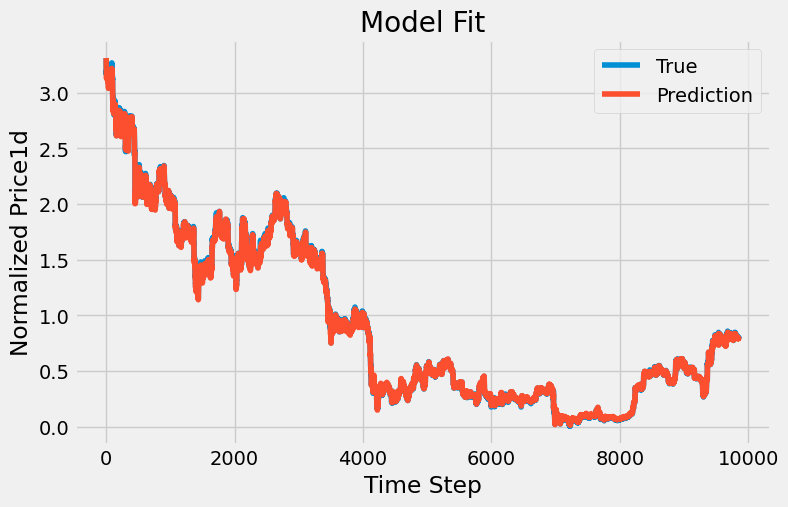

In [9]:
y_pred1d = model.predict(x_test1d)
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Normalized Price1d')
plt.plot(y_test1d, label='True')
plt.plot(y_pred1d, label='Prediction')
plt.legend()

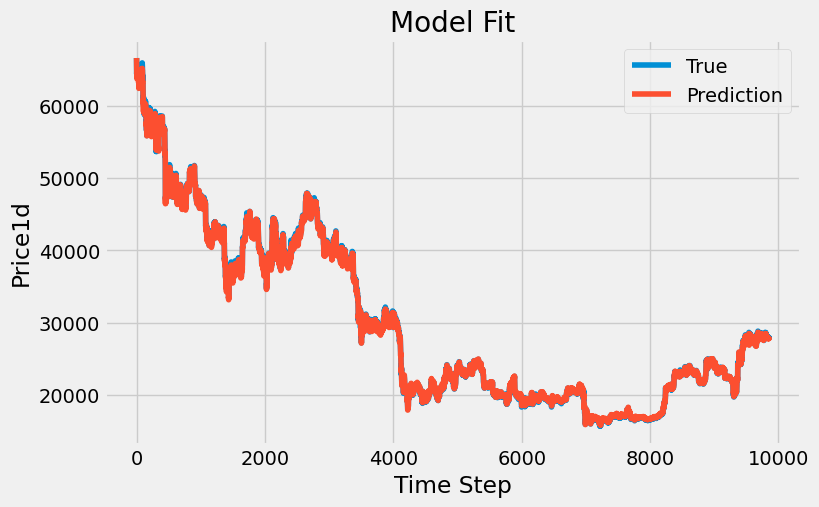

In [10]:
y_pred1d = np.array(y_pred1d.reshape(9858,1))
y_test1d = np.array(y_test1d.reshape(9858,1))
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price1d')
plt.plot(scaler.inverse_transform(y_test1d), label='True')
plt.plot(scaler.inverse_transform(y_pred1d), label='Prediction')
plt.legend()

In [11]:
api_key = '<your api key>'
api_secret = '<your api secret>'
client = Client(api_key, api_secret)
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_5MINUTE
bars = client.get_historical_klines(symbol, interval, "1 Jan 2017")
df = pd.DataFrame(bars, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
df.set_index('Timestamp', inplace=True)
df.drop(['Open', 'High', 'Low', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'], axis=1, inplace=True)
print(df)

                              Close
Timestamp                          
2017-08-17 04:00:00   4261.48000000
2017-08-17 04:05:00   4261.48000000
2017-08-17 04:10:00   4261.48000000
2017-08-17 04:15:00   4261.48000000
2017-08-17 04:20:00   4266.29000000
...                             ...
2023-04-15 13:00:00  30427.85000000
2023-04-15 13:05:00  30419.89000000
2023-04-15 13:10:00  30427.88000000
2023-04-15 13:15:00  30420.72000000
2023-04-15 13:20:00  30420.65000000

[593694 rows x 1 columns]


In [12]:
df2 = df
df2 = np.array(df2)
df2 = df2.tolist()
price2d = np.array([float(df2[i][0]) for i in range(591610)])
price2d = price2d.reshape(591610,1)
scaler = StandardScaler()
scaler.fit(price2d[:437791])
StandardScaler(copy=False, with_mean=False, with_std=True)
price2d = scaler.transform(price2d)
df2 = pd.DataFrame(price2d.reshape(118322,5),columns=['First','Second','Third','Fourth', 'Target'])
df2.head()

,First,Second,Third,Fourth,Target
0,-0.735863,-0.735863,-0.735863,-0.735863,-0.735551
1,-0.735865,-0.733582,-0.733339,-0.732710,-0.733882
2,-0.732481,-0.732790,-0.733084,-0.731502,-0.733084
3,-0.732066,-0.732066,-0.732066,-0.732066,-0.733923
4,-0.733923,-0.733556,-0.732369,-0.732369,-0.731398


In [13]:
x_train2d = df2.iloc[:88741,:4]
y_train2d = df2.iloc[:88741,-1]
x_test2d = df2.iloc[88743:118321,:4]
y_test2d = df2.iloc[88743:118321,-1]
x_train2d = np.array(x_train2d)
y_train2d = np.array(y_train2d)
x_test2d = np.array(x_test2d)
y_test2d = np.array(y_test2d)
x_train2d = np.reshape(x_train2d, (x_train2d.shape[0], x_train2d.shape[1], 1))
x_test2d  = np.reshape(x_test2d, (x_test2d.shape[0], x_test2d.shape[1], 1))
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape=(4, 1)))
model.add(LSTM(40, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
print(model.summary())
model.fit(x_train2d, y_train2d, batch_size=55,epochs=15)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4, 20)             1760      
                                                                 
 lstm_3 (LSTM)               (None, 40)                9760      
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 11,561
Trainable params: 11,561
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1614/1614 [==============================] - 7s 3ms/step - loss: 0.0099
Epoch 2/15
1614/1614 [==============================] - 4s 3ms/step - loss: 5.2979e-04
Epoch 3/15
1614/1614 [==============================] - 4s 3ms/step - loss: 4.5755e-04
Epoch 4/15
1614/1614 [==============================

In [14]:
x_test2d.shape

(29578, 4, 1)

925/925 [==============================] - 2s 1ms/step


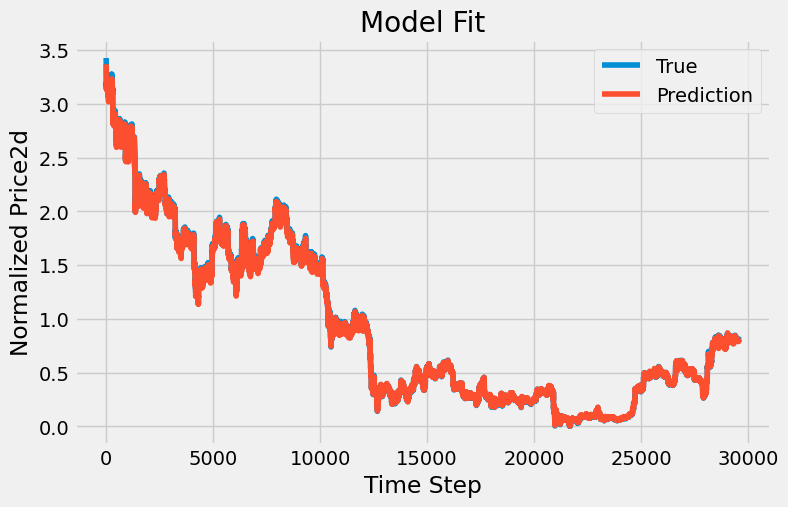

In [15]:
y_pred2d = model.predict(x_test2d)
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Normalized Price2d')
plt.plot(y_test2d, label='True')
plt.plot(y_pred2d, label='Prediction')
plt.legend()

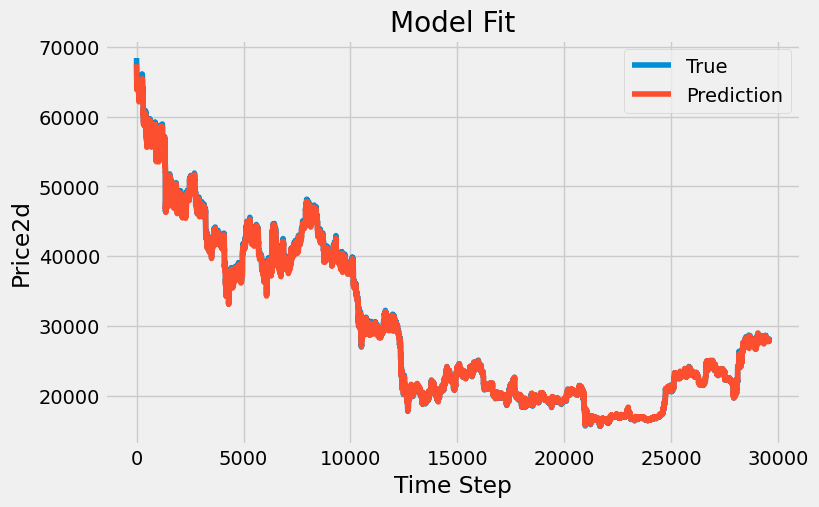

In [16]:
y_pred2d = np.array(y_pred2d.reshape(29578,1))
y_test2d = np.array(y_test2d.reshape(29578,1))
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price2d')
plt.plot(scaler.inverse_transform(y_test2d), label='True')
plt.plot(scaler.inverse_transform(y_pred2d), label='Prediction')
plt.legend()

In [17]:
api_key = 'paste your keys here'
api_secret = 'paste your keys here'
client = Client(api_key, api_secret)
candles = client.get_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_1MINUTE, limit = 1000)
len(candles)

1000

In [18]:
price = np.array([float(candles[i][4]) for i in range(1000)])
openprice = np.array([float(candles[i][1]) for i in range(1000)])
time = np.array([int(candles[i][0]) for i in range(1000)])
t = np.array([datetime.fromtimestamp(time[i]/1000).strftime('%H:%M:%S') for i in range(1000)])
price.shape, openprice.shape

((1000,), (1000,))

In [19]:
Price = price[:,] - openprice[:,]
Price

array([-6.250e+00, -9.340e+00,  1.900e-01,  1.535e+01, -2.216e+01,
       -1.673e+01, -7.130e+00,  4.710e+00, -2.900e-01, -1.000e-02,
       -1.200e+00, -6.120e+00, -1.180e+01,  1.870e+00, -3.700e-01,
       -2.170e+00, -1.540e+00,  5.540e+00, -4.340e+00,  6.720e+00,
        5.400e+00, -1.465e+01, -3.485e+01,  2.042e+01, -1.411e+01,
       -3.410e+00, -1.604e+01,  2.565e+01,  8.200e-01,  1.172e+01,
        1.070e+00,  1.171e+01,  9.700e+00,  9.920e+00, -5.950e+00,
        2.440e+00, -1.822e+01, -1.170e+01, -5.600e+00,  9.330e+00,
        2.310e+00, -6.920e+00,  1.226e+01,  6.780e+00,  1.379e+01,
        0.000e+00,  2.000e+00,  5.770e+00,  2.300e-01,  1.218e+01,
        5.140e+00, -3.590e+00, -2.030e+00, -1.134e+01,  2.470e+00,
        1.114e+01,  7.440e+00,  5.300e+00,  2.790e+00, -5.100e-01,
       -1.413e+01,  1.200e-01, -1.940e+00, -8.470e+00, -2.880e+00,
        7.860e+00,  1.502e+01,  1.442e+01,  3.000e-02, -1.236e+01,
       -2.237e+01, -4.782e+01,  9.990e+00,  2.136e+01, -4.760e

In [20]:
Price = Price.reshape(1000,1)
price = price.reshape(1000,1)
Price.shape

(1000, 1)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(price[:750])

StandardScaler()

In [22]:
StandardScaler(copy=False, with_mean=False, with_std=True)
price = scaler.transform(price)
df = pd.DataFrame(price.reshape(200,5),columns=['First','Second','Third','Fourth','Target'])
df.head()

,First,Second,Third,Fourth,Target
0,2.363491,2.120765,2.125448,2.525048,1.948541
1,1.513299,1.327547,1.450081,1.442797,1.442537
2,1.411578,1.252622,0.945637,0.994026,0.984401
3,0.927947,0.888143,1.032009,0.919101,1.093927
4,1.234411,0.853282,-0.053364,0.477876,0.110534


In [23]:
x_train = df.iloc[:174,:4]
y_train = df.iloc[:174,-1]
x_test = df.iloc[175:199,:4]
y_test = df.iloc[175:199,-1]
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape=(4, 1)))
model.add(LSTM(40, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
print(model.summary())
model.fit(x_train, y_train, batch_size=5,epochs=300)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 4, 20)             1760      
                                                                 
 lstm_5 (LSTM)               (None, 40)                9760      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 11,561
Trainable params: 11,561
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
35/35 [==============================] - 3s 2ms/step - loss: 0.5087
Epoch 2/300
35/35 [==============================] - 0s 2ms/step - loss: 0.1476
Epoch 3/300
35/35 [==============================] - 0s 2ms/step - loss: 0.1365
Epoch 4/300
35/35 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 1s 547ms/step


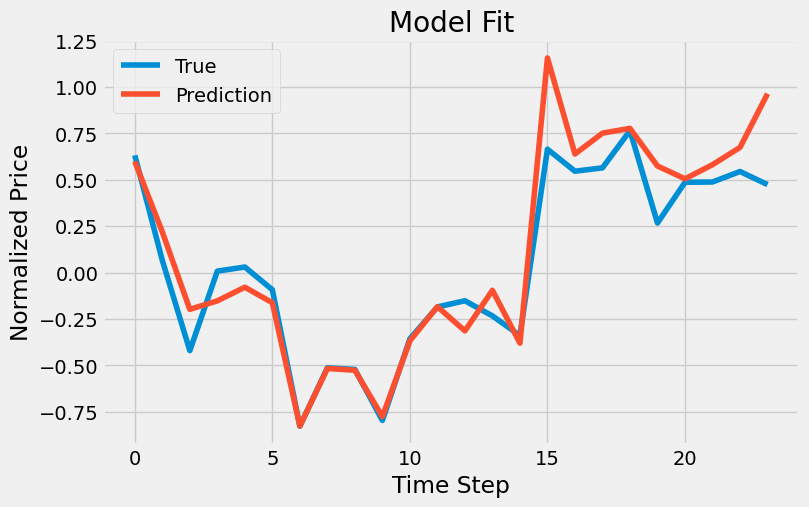

In [24]:
y_pred = model.predict(x_test)
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Normalized Price')
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Prediction')
plt.legend()

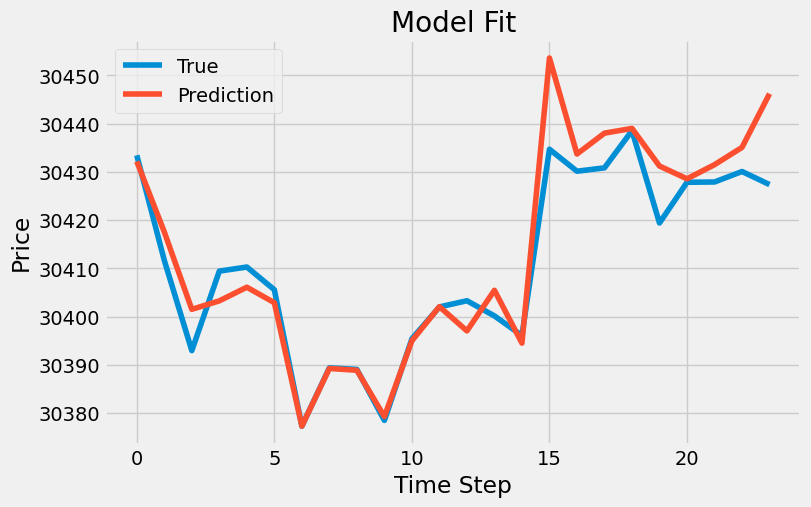

In [25]:
y_pred = np.array(y_pred.reshape(24,1))
y_test = np.array(y_test.reshape(24,1))
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(y_pred), label='Prediction')
plt.legend()

In [26]:
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(y_pred)))
print('Test Score: %.2f RMSE' % (testScore))
from sklearn.metrics import r2_score
print('RSquared :','{:.2%}'.format(r2_score(y_test,y_pred)))

Test Score: 7.06 RMSE
RSquared : 85.18%


In [27]:
from sklearn.svm import SVR
#75% train , 25% test
trainX = df.iloc[:174,:4]
trainY = df.iloc[:174,-1]
testX = df.iloc[175:199,:4]
testY = df.iloc[175:199,-1]
svr_linear = SVR(kernel='linear',C=1e3, gamma=0.1)
svr_linear.fit(trainX,trainY)
SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
predY = svr_linear.predict(testX)

In [28]:
predY = np.array(predY.reshape(24,1))
testY = np.array(testY.values.reshape(24,1))
testY.shape, predY.shape

((24, 1), (24, 1))

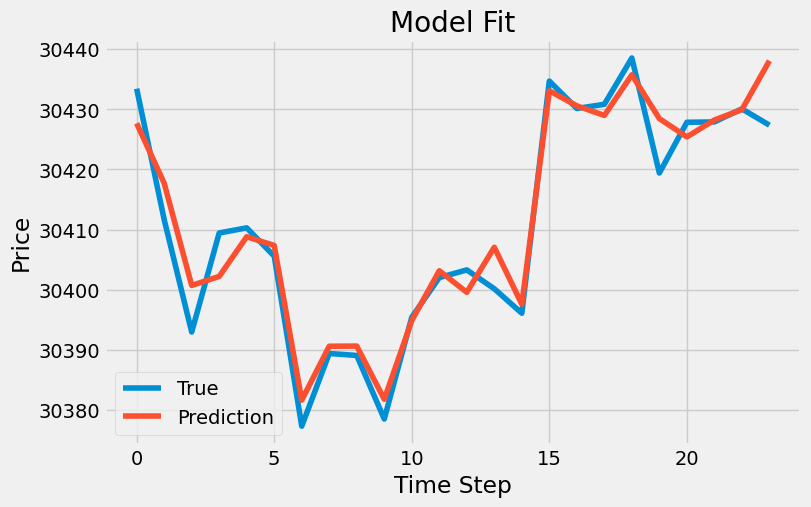

In [29]:
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.plot(scaler.inverse_transform(testY), label='True')
plt.plot(scaler.inverse_transform(predY), label='Prediction')
plt.legend()

In [30]:
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform(testY),scaler.inverse_transform(predY)))
print('Test Score: %.2f RMSE' % (testScore))
print('RSquared :','{:.2%}'.format(r2_score(testY,predY)))
param_grid = {"C": [1e-2,1e-1,1e0, 1e1, 1e2, 1e3, 1e4],
              "gamma": np.logspace(-2, 2, 50),
             'epsilon':[0.1,0.2,0.5,0.3]}
from sklearn.model_selection import RandomizedSearchCV
svm_model = SVR(kernel='linear')
grid_search = RandomizedSearchCV(svm_model,param_grid,scoring='r2',n_jobs=-1)
grid_search.fit(trainX,trainY)
print(grid_search.best_estimator_)
SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=100.0,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svm_model = SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=100.0,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svm_model.fit(trainX,trainY)
pred = svm_model.predict(testX)

Test Score: 4.58 RMSE
RSquared : 93.78%
SVR(C=10.0, epsilon=0.3, gamma=1.9306977288832496, kernel='linear')


In [31]:
pred = np.array(pred.reshape(24,1))
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform(testY),scaler.inverse_transform(pred)))
print('Test Score: %.2f RMSE' % (testScore))
print('RSquared :','{:.2%}'.format(r2_score(testY,pred)))

Test Score: 4.54 RMSE
RSquared : 93.87%


In [32]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV()
ridge.fit(trainX,trainY)
Rpred = ridge.predict(testX)
Rpred = np.array(Rpred.reshape(24,1))
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform(testY),scaler.inverse_transform(Rpred)))
print('Test Score :',testScore)
print('RSquared :','{:.2%}'.format(r2_score(testY,Rpred)))

Test Score : 4.447170233243678
RSquared : 94.12%


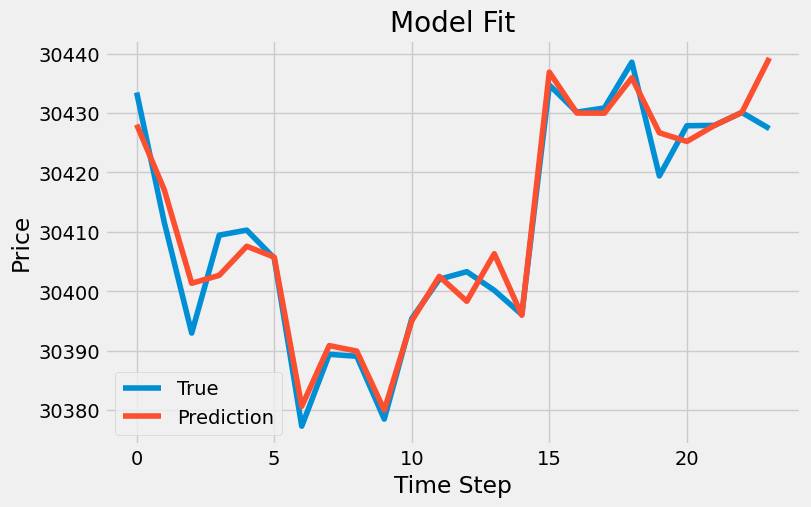

In [33]:
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.plot(scaler.inverse_transform(testY), label='True')
plt.plot(scaler.inverse_transform(Rpred), label='Prediction')
plt.legend()

In [34]:
normal_price = np.array([float(candles[i][4]) for i in range(1000)])
data = pd.DataFrame(normal_price.reshape(200,5),columns=['First','Second','Third','Fourth','Target'])

In [35]:
from torch import nn
from tpot import TPOTClassifier
from tpot import TPOTRegressor
import numpy as np
x_train_r = np.float64(data.iloc[:174,:4])
y_train_r = np.float64(data.iloc[:174,-1])
x_test_r = np.float64(data.iloc[175:199,:4])
y_test_r = np.float64(data.iloc[175:199,-1])
tpot = TPOTRegressor(generations=15, population_size=25, verbosity=2)
tpot.fit(x_train_r, y_train_r)

                                                                                                                       
Generation 1 - Current best internal CV score: -85.63493949170368
                                                                                                                       
Generation 2 - Current best internal CV score: -85.51741984609173
                                                                                                                       
Generation 3 - Current best internal CV score: -85.51741984609173
                                                                                                                       
Generation 4 - Current best internal CV score: -85.51741984609173
                                                                                                                       
Generation 5 - Current best internal CV score: -85.51741984609173
                                                                      

TPOTRegressor(generations=15, population_size=25, verbosity=2)

In [36]:
tpred = tpot.predict(x_test_r)
testScore = np.sqrt(mean_squared_error(y_test_r,tpred))
print('Test Score: %.2f RMSE' % (testScore))
print('RSquared :','{:.2%}'.format(r2_score(y_test_r,tpred)))

Test Score: 4.44 RMSE
RSquared : 94.15%


In [37]:
check = client.get_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_1MINUTE)
index = [496,495,498,499]
candles = scaler.transform(np.array([float(check[i][4]) for i in index]).reshape(4,-1))
model_feed = candles.reshape(1,4,1)
scaler.inverse_transform(model.predict(model_feed))[0][0]

1/1 [==============================] - 0s 21ms/step


30409.11

In [38]:
from h5py import version
import h5py 
from h5py import version
model.save("BeefedBitcoin_model.h5") 
from keras.models import load_model 
model = load_model('BeefedBitcoin_model.h5') 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 4, 20)             1760      
                                                                 
 lstm_5 (LSTM)               (None, 40)                9760      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 11,561
Trainable params: 11,561
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.save("BeefedBitcoin_model.py") 

INFO:tensorflow:Assets written to: BeefedBitcoin_model.py\assets


INFO:tensorflow:Assets written to: BeefedBitcoin_model.py\assets
